In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('loan_data.csv',usecols=['person_age','loan_amnt','person_income','credit_score','loan_status'])

In [3]:
df.isna().sum()

person_age       0
person_income    0
loan_amnt        0
credit_score     0
loan_status      0
dtype: int64

In [28]:
df.head(10)

,person_age,person_income,loan_amnt,credit_score,loan_status
0,22.0,71948.0,35000.0,561,1
1,21.0,12282.0,1000.0,504,0
2,25.0,12438.0,5500.0,635,1
3,23.0,79753.0,35000.0,675,1
4,24.0,66135.0,35000.0,586,1
5,21.0,12951.0,2500.0,532,1
6,26.0,93471.0,35000.0,701,1
7,24.0,95550.0,35000.0,585,1
8,24.0,100684.0,35000.0,544,1
9,21.0,12739.0,1600.0,640,1


C:\Users\DELL\AppData\Local\Temp\ipykernel_6552\3173266555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_age'])


<Axes: xlabel='person_age', ylabel='Density'>

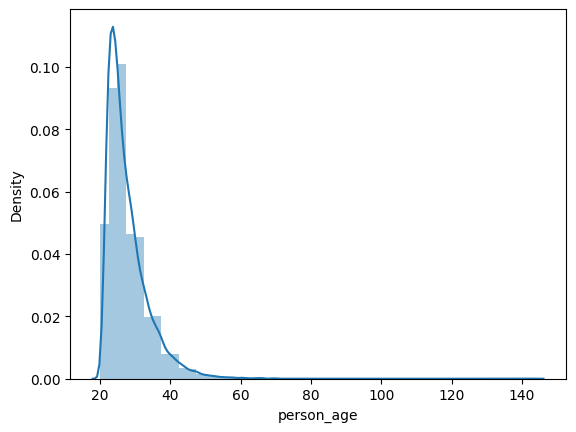

In [5]:
sns.distplot(df['person_age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6552\2498932030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_income'])


<Axes: xlabel='person_income', ylabel='Density'>

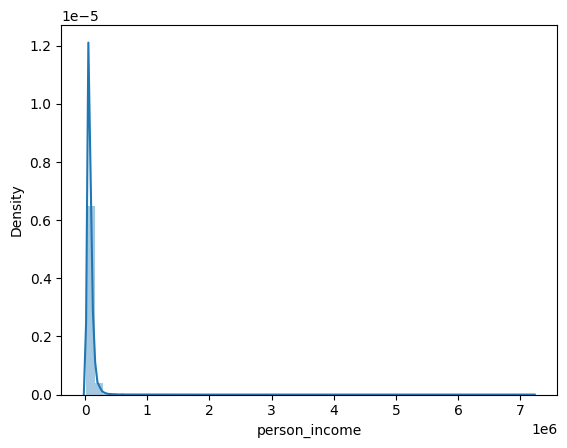

In [6]:
sns.distplot(df['person_income'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_6552\2877904750.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

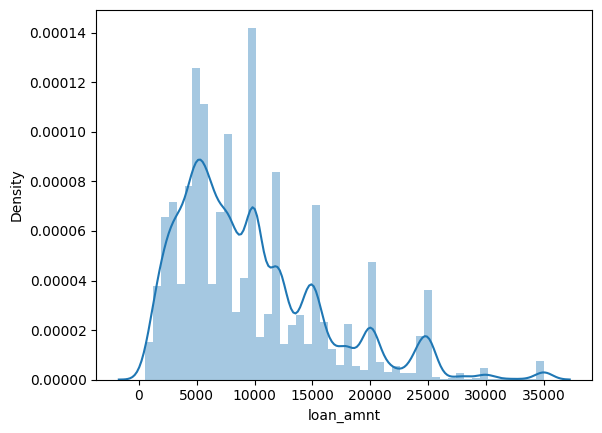

In [7]:
sns.distplot(df['loan_amnt'])


In [8]:
x=df.iloc[:,0:4]
y=df['loan_status']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
X_train

,person_age,person_income,loan_amnt,credit_score
25180,34.0,97265.0,15000.0,631
12555,25.0,72953.0,12000.0,659
29153,41.0,322597.0,24000.0,683
23838,27.0,94232.0,9600.0,641
35686,27.0,84873.0,7059.0,706
...,...,...,...,...
11284,26.0,88451.0,10625.0,559
44732,25.0,34772.0,5876.0,647
38158,33.0,58317.0,10707.0,652
860,26.0,178602.0,20000.0,604


In [11]:
y_test

37979    0
9911     0
43386    1
13822    0
44810    1
        ..
14572    0
30384    0
36665    0
30569    0
5321     0
Name: loan_status, Length: 9000, dtype: int64

In [12]:
clf=LogisticRegression()

In [13]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [14]:
print("Accuracy Score LR:",accuracy_score(y_test,y_pred))

Accuracy Score LR: 0.7912222222222223


In [15]:
from sklearn.preprocessing import KBinsDiscretizer

In [16]:
k_bin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
k_bin_income=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')


In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
trf=ColumnTransformer([('first',k_bin_age,[0]),
                       
                       ('second',k_bin_income,[1])
                      ],remainder='passthrough')

In [19]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.fit_transform(X_test)

In [20]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [21]:
clf.fit(X_train_trf,y_train)

LogisticRegression()

In [22]:
y1_pred=clf.predict(X_test_trf)
print("Accuracy Score after:",accuracy_score(y1_pred,y_test))

Accuracy Score after: 0.7993333333333333


In [23]:
X_train_trf

array([[8.0000e+00, 7.0000e+00, 1.5000e+04, 6.3100e+02],
       [4.0000e+00, 5.0000e+00, 1.2000e+04, 6.5900e+02],
       [9.0000e+00, 9.0000e+00, 2.4000e+04, 6.8300e+02],
       ...,
       [8.0000e+00, 3.0000e+00, 1.0707e+04, 6.5200e+02],
       [5.0000e+00, 9.0000e+00, 2.0000e+04, 6.0400e+02],
       [5.0000e+00, 9.0000e+00, 1.5000e+04, 6.6400e+02]])

In [24]:
  clf2=DecisionTreeClassifier()

In [26]:
clf2.fit(X_train,y_train)
y2_pred=clf.predict(X_test)
print("Accuracy Score DT:",accuracy_score(y2_pred,y_test))

Accuracy Score DT: 0.7766666666666666


C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [27]:
clf2.fit(X_train_trf,y_train)
y2_pred_trf=clf.predict(X_test_trf)
print("Accuracy Score DT:",accuracy_score(y2_pred_trf,y_test))

Accuracy Score DT: 0.7993333333333333
